# Social Network Analysis 
Networks are created and manipulated using the NetworkX module.

In [1]:
import networkx as nx


In [2]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from(["u","v"])

G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [3]:
G.add_edge(1,2)
G.add_edge("u","v")
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])
G.add_edge("u","w")
G.edges()



EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [4]:
G.remove_node(3)
G.remove_nodes_from([4,5])

print(G.nodes())
print(G.edges())

[1, 2, 'u', 'v', 6, 'w']
[(1, 2), (1, 6), ('u', 'v'), ('u', 'w')]


In [5]:
G.remove_edge("u","v")
G.remove_edges_from([(1,2),(1,6)])
G.edges()


EdgeView([('u', 'w')])

In [6]:
G.number_of_nodes()

6

In [7]:
G.number_of_edges()

1

Networkx have empirical data sets. Let's use one called the karate club graph.
In this network, the nodes represent members of a karate club and the edges correspond to friendships between the members.


In [8]:
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
nx.draw(G, with_labels = True, node_color="lightblue", edge_color = "gray")


Networkx stores the degrees of nodes in a dictionary where the keys are node IDs and the values are their associated degrees.

In [9]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [10]:
G.degree()[0] # G dot degree gives us the dictionary which is accessed by keys.

16

In [11]:
G.degree(33)

17

In [12]:
G.number_of_edges()

78

**Erdos-Renyi** also known as the ER graph model.
This family of random graphs has two parameters, capital N and lowercase p.
Here the capital N is the number of nodes in the graph,and p is the probability for any pair of nodes to be connected by an edge.
Here's one way to think about it-- imagine starting with N nodes and no edges.
You can then go through every possible pair of nodes and with probability p insert an edge between them.
In other words, you're considering each pair of nodesonce, independently of any other pair.
You flip a coin to see if they're connected, and then you move on to the next pair.
If the value of p is very small, typical graphs generated from the model tend to be sparse, meaning having few edges.
In contrast, if the value of p is large, typical graphstend to be densely connected.

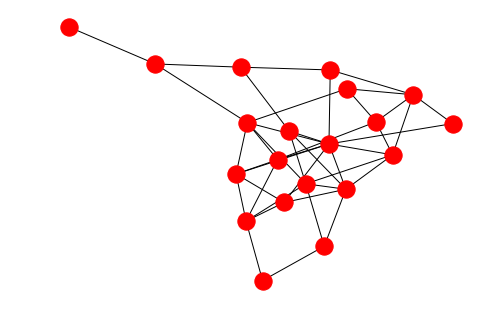

In [13]:
from scipy.stats import bernoulli 

def er_graph(N, p):
    """Generate an ER graph."""
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node_1 in G.nodes():
        for node_2 in G.nodes():
            if node_1 < node_2 and bernoulli.rvs(p=p):
                G.add_edge(node_1, node_2)
    return G

    
nx.draw(er_graph(20, 0.2))    

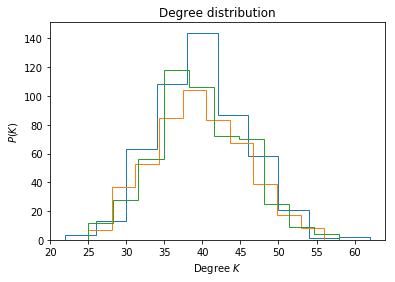

In [14]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $K$")
    plt.ylabel("$P(K)$")
    plt.title("Degree distribution")

G1 = er_graph(500, 0.08)
plot_degree_distribution(G1) 
G2 = er_graph(500, 0.08)
plot_degree_distribution(G2) 
G3 = er_graph(500, 0.08)
plot_degree_distribution(G3) 
    

We will look at basic properties of the social networks from two different villages in rural India.
A census of households was conducted, and a subset of individuals was asked detailed questions about the relationships they have with others in the village.
This information was used to create networks for each village. Basic information for all households and all surveyed individuals was also collected. The structure of connections in a network can be captured in what is known as the Adjacency matrix of the network.
If we have n nodes, this is n by n matrix,where entry ij is one if node i and node j have a tie between them.
Otherwise, that entry is equal to zero.
The graphs we're dealing with are called undirected, which means that a tie between nodes i and j can just as well be described as a tie between nodes j and i.
Consequently, the adjacency matrix is symmetric.
That means that the element ij is always the same as the element ji.
Either both are zero or both are equal to 1.

In [15]:
import numpy as np

A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

G1 = nx.to_networkx_graph(A1) 
G2 = nx.to_networkx_graph(A2) 

In [16]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))


In [17]:
basic_net_stats(G1)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08


In [18]:
basic_net_stats(G2)

Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


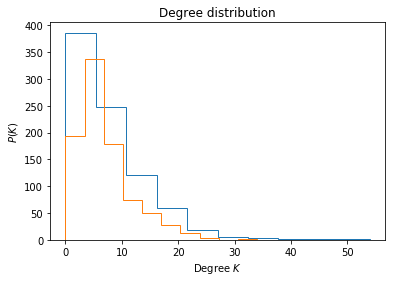

In [19]:
plot_degree_distribution(G1) 
plot_degree_distribution(G2) 


In [20]:
gen = nx.connected_component_subgraphs(G) 
g = gen.__next__() # after ever next we get single component.
print("Number of node in this sub componant" , len(g))
print("Number of node in this sub componant" , g.number_of_nodes())

Number of node in this sub componant 34
Number of node in this sub componant 34


Let's compute the proportion of nodes that lie in the largest connected components for these two graphs.
First get largest connected component then We can divide that by the number of nodes in the graph itself.


In [21]:
G1_LCC = max(nx.connected_component_subgraphs(G1) , key=len) # get the largest connected componant in G1
G2_LCC = max(nx.connected_component_subgraphs(G2) , key=len) # get the largest connected componant in G2

print("Connected component percentage in G1" ,G1_LCC.number_of_nodes() / G1.number_of_nodes() )
print("Connected component percentage in G2" ,G2_LCC.number_of_nodes() / G2.number_of_nodes())


Connected component percentage in G1 0.9786476868327402
Connected component percentage in G2 0.9236031927023945


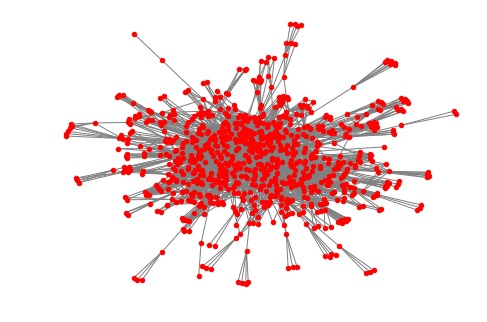

In [22]:
nx.draw(G1_LCC, node_color = "red", edge_color = "gray", node_size = 20)

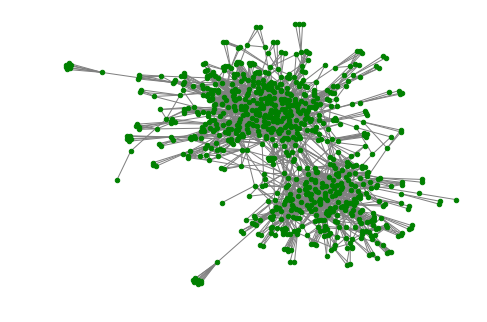

In [23]:
nx.draw(G2_LCC, node_color = "green", edge_color = "gray", node_size = 20)

Network **homophily** occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.
In this exercise, we will calculate the chance homophily for an arbitrary characteristic. Homophily is the proportion of edges in the network whose constituent nodes share that characteristic. How much homophily do we expect by chance? If characteristics are distributed completely randomly, the probability that two nodes x and y share characteristic a is the probability both nodes have characteristic a, which is the frequency of a squared. The total probability that nodes x and y share their characteristic is therefore the sum of the frequency of each characteristic in the network. For example, in the dictionary favorite_colors provided, the frequency of red and blue is 1/3 and 2/3 respectively, so the chance homophily is (1/3)^2+(2/3)^2 = 5/9.

In [24]:
def frequency(chars):
    frequency_dic = {}
    for key in chars:
        if chars[key] in frequency_dic:
            frequency_dic[chars[key]] += 1
        else:
            frequency_dic[chars[key]] = 1
    return frequency_dic
    
def chance_homophily(chars):
    frequency_dic = frequency(chars)
    sum_value = sum(frequency_dic.values())
    chance_homophily = 0
    for key in frequency_dic:
        chance_homophily += (frequency_dic[key]/sum_value) ** 2
    return chance_homophily
favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}
color_homophily = chance_homophily(favorite_colors)
color_homophily

0.5555555555555556

In [25]:
G1 = er_graph(50, 0.08)
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [26]:
import pandas as pd
df  = pd.read_stata("individual_characteristics.dta")
df1 = df[df.village == 1]
df2 = df[df.village == 2]

# Enter code here!
print(df1.head())

   village  adjmatrix_key     pid  hhid  resp_id  resp_gend  \
0        1              5  100201  1002        1          1   
1        1              6  100202  1002        2          2   
2        1             23  100601  1006        1          1   
3        1             24  100602  1006        2          2   
4        1             27  100701  1007        1          1   

                   resp_status  age  religion caste        ...         \
0            Head of Household   38  HINDUISM   OBC        ...          
1  Spouse of Head of Household   27  HINDUISM   OBC        ...          
2            Head of Household   29  HINDUISM   OBC        ...          
3  Spouse of Head of Household   24  HINDUISM   OBC        ...          
4            Head of Household   58  HINDUISM   OBC        ...          

        privategovt work_outside work_outside_freq shgparticipate shg_no  \
0  PRIVATE BUSINESS          Yes                 0             No    NaN   
1                            N

In this exercise, we define a few dictionaries that enable us to look up the sex, caste, and religion of members of each village by personal ID. For Villages 1 and 2, their personal IDs are stored as pid.

In [27]:
sex1      = df1.set_index("pid")["resp_gend"].to_dict()
caste1    = df1.set_index("pid")["caste"].to_dict()
religion1 = df1.set_index("pid")["religion"].to_dict()

# Continue for df2 as well.
sex2      = df2.set_index("pid")["resp_gend"].to_dict()
caste2    = df2.set_index("pid")["caste"].to_dict()
religion2 = df2.set_index("pid")["religion"].to_dict()

compute the chance homophily for sex, caste, and religion In Villages 1 and 2. Is the chance homophily for any attribute very high for either village?

In [28]:
print("Village 1 chance of same sex:", chance_homophily(sex1))
print("Village 1 chance of same caste:", chance_homophily(caste1))
print("Village 1 chance of same religion:", chance_homophily(religion1))


print("Village 2 chance of same sex:", chance_homophily(sex2))
print("Village 2 chance of same caste:", chance_homophily(caste2))
print("Village 2 chance of same religion:", chance_homophily(religion2))

Village 1 chance of same sex: 0.5027299861680701
Village 1 chance of same caste: 0.6741488509791551
Village 1 chance of same religion: 0.9804896988521925
Village 2 chance of same sex: 0.5005945303210464
Village 2 chance of same caste: 0.425368244800893
Village 2 chance of same religion: 1.0


We will create a function that computes the observed homophily given a village and characteristic.

For each node pair, determine whether a tie exists between them, as well as whether they share a characteristic. The total count of these is num_same_ties and num_ties respectively, and their ratio is the homophily of chars in G. Complete the function by choosing where to increment num_same_ties and num_ties

In [82]:
def homophily(G, chars, IDs):
    """
    Given a network G, a dict of characteristics chars for node IDs,
    and dict of node IDs for each node in the network,
    find the homophily of the network.
    """
    num_same_ties = 0
    num_ties = 0
    for n1, n2 in G.edges():
        if IDs[n1] in chars and IDs[n2] in chars:
            if G.has_edge(n1, n2):
                num_ties += 1
                # Should `num_ties` be incremented?  What about `num_same_ties`?
                if chars[IDs[n1]] == chars[IDs[n2]]:
                    num_same_ties +=1
                    # Should `num_ties` be incremented?  What about `num_same_ties`?
    return (num_same_ties / num_ties)    

Obtain the personal IDs for Villages 1 and 2

In [83]:
data_filepath = "https://s3.amazonaws.com/assets.datacamp.com/production/course_974/datasets/"
pid1 = pd.read_csv("key_vilno_1.csv",header = None)
pid2 = pd.read_csv("key_vilno_2.csv",header = None)


Compute the homophily of several network characteristics for Villages 1 and 2, and compare this to chance homophily. 

In [84]:
pid1  = pid1[pid1.columns[0]].tolist()
pid2  = pid2[pid2.columns[0]].tolist()

print("Village 1 observed proportion of same sex:", homophily(G1, sex1, pid1))
print("Village 1 observed proportion of same caste:", homophily(G1, caste1, pid1))
print("Village 1 observed proportion of same religion:", homophily(G1, religion1, pid1))
print("Village 2 observed proportion of same sex:", homophily(G2, sex2, pid2))
print("Village 2 observed proportion of same caste:", homophily(G2, caste2, pid2))
print("Village 2 observed proportion of same religion:", homophily(G2, religion2, pid2))



Village 1 observed proportion of same sex: 0.5
Village 1 observed proportion of same caste: 1.0
Village 1 observed proportion of same religion: 1.0
Village 2 observed proportion of same sex: 0.5658073270013568
Village 2 observed proportion of same caste: 0.8276797829036635
Village 2 observed proportion of same religion: 1.0
